In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [88]:
def expand_date(dataframe):
    df_copy = dataframe.copy()
    X = pd.to_datetime(df_copy['date'], format="%Y-%m-%d")
    df_copy['year'] = [x.year for x in X]
    df_copy['month'] = [x.month for x in X]
    df_copy['day'] = [x.day for x in X]
    df_copy['weekday'] = [x.weekday() for x in X]
    df_copy = df_copy.drop(columns=['date'])
    print(df_copy.head())
    return df_copy

In [42]:
df = pd.read_sql_table('manhattan_loc_d_ar_wea', 'postgresql:///walk')

In [73]:
df['n_arrests'] = df['n_arrests'].fillna(value=0).astype(int)

In [89]:
df_expanded = expand_date(df)

   latitude  longitude  n_arrests  ap_t_high100  ap_t_low100  cloud  humidity  \
0    40.683    -74.023          0          1943         1085      5        57   
1    40.684    -74.012          0          1943         1085      5        57   
2    40.684    -74.024          0          1943         1085      5        57   
3    40.685    -74.022          0          1943         1085      5        57   
4    40.685    -74.023          0          1943         1085      5        57   

        icon  moon_phase  precip_inten_max10000  ...  sunriseTime  sunsetTime  \
0  clear-day          54                      0  ...   1514895663  1514929247   
1  clear-day          54                      0  ...   1514895663  1514929247   
2  clear-day          54                      0  ...   1514895663  1514929247   
3  clear-day          54                      0  ...   1514895663  1514929247   
4  clear-day          54                      0  ...   1514895663  1514929247   

   uvIndex  wind_gust100  

In [90]:
df_expanded.columns

Index(['latitude', 'longitude', 'n_arrests', 'ap_t_high100', 'ap_t_low100',
       'cloud', 'humidity', 'icon', 'moon_phase', 'precip_inten_max10000',
       'precip_proba100', 'precipType', 'pressure', 'sunriseTime',
       'sunsetTime', 'uvIndex', 'wind_gust100', 'precip_accum100', 'ozone10',
       'year', 'month', 'day', 'weekday'],
      dtype='object')

In [52]:
def plot_w_best_fit_line(x, y):
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

    plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

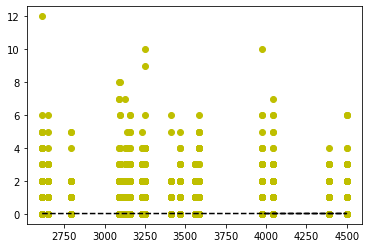

In [53]:
df_ozone = df_expanded.dropna()
plot_w_best_fit_line(df_ozone['ozone10'], df_ozone['n_arrests'])


In [ ]:
df_expanded.

In [ ]:
plot_w_best_fit_line(df_expanded['year'])

In [54]:
df_expanded = df_expanded.drop(columns=['ozone10'])
df_expanded.fillna(0)

,latitude,longitude,n_arrests,ap_t_high100,ap_t_low100,cloud,humidity,icon,moon_phase,precip_inten_max10000,precip_proba100,precipType,pressure,sunriseTime,sunsetTime,uvIndex,wind_gust100,precip_accum100
0,40.683,-74.023,0,1943,1085,5,57,clear-day,54,0,0,0,1029,1514895663,1514929247,2,1259,0.0
1,40.684,-74.012,0,1943,1085,5,57,clear-day,54,0,0,0,1029,1514895663,1514929247,2,1259,0.0
2,40.684,-74.024,0,1943,1085,5,57,clear-day,54,0,0,0,1029,1514895663,1514929247,2,1259,0.0
3,40.685,-74.022,0,1943,1085,5,57,clear-day,54,0,0,0,1029,1514895663,1514929247,2,1259,0.0
4,40.685,-74.023,0,1943,1085,5,57,clear-day,54,0,0,0,1029,1514895663,1514929247,2,1259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440035,40.878,-73.909,0,8357,6475,37,58,partly-cloudy-day,94,39,29,rain,1009,1561886932,1561941130,5,1425,0.0
3440036,40.878,-73.910,0,8357,6475,37,58,partly-cloudy-day,94,39,29,rain,1009,1561886932,1561941130,5,1425,0.0
3440037,40.878,-73.911,0,8357,6475,37,58,partly-cloudy-day,94,39,29,rain,1009,1561886932,1561941130,5,1425,0.0
3440038,40.878,-73.912,0,8357,6475,37,58,partly-cloudy-day,94,39,29,rain,1009,1561886932,1561941130,5,1425,0.0


In [58]:
from statsmodels.formula.api import ols

In [62]:
df_expanded.columns

Index(['latitude', 'longitude', 'n_arrests', 'ap_t_high100', 'ap_t_low100',
       'cloud', 'humidity', 'icon', 'moon_phase', 'precip_inten_max10000',
       'precip_proba100', 'precipType', 'pressure', 'sunriseTime',
       'sunsetTime', 'uvIndex', 'wind_gust100', 'precip_accum100'],
      dtype='object')

In [91]:
for col in df_expanded.columns:
    outcome = 'n_arrests'
    predictor = col
    formula = outcome + '~' + predictor
    model = ols(formula=formula, data=df_expanded).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              n_arrests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     388.5
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.75e-86
Time:                        14:13:09   Log-Likelihood:            -3.4180e+05
No. Observations:             3440040   AIC:                         6.836e+05
Df Residuals:                 3440038   BIC:                         6.836e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6213      0.132     19.910      0.0

                            OLS Regression Results                            
Dep. Variable:              n_arrests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.692
Date:                Tue, 05 Nov 2019   Prob (F-statistic):             0.0547
Time:                        14:13:15   Log-Likelihood:            -3.4199e+05
No. Observations:             3440040   AIC:                         6.840e+05
Df Residuals:                 3440038   BIC:                         6.840e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0266      0.000     93.542      0.0

                            OLS Regression Results                            
Dep. Variable:              n_arrests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     27.69
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.42e-07
Time:                        14:13:37   Log-Likelihood:            -3.4198e+05
No. Observations:             3440040   AIC:                         6.840e+05
Df Residuals:                 3440038   BIC:                         6.840e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0268      0.000    1

                            OLS Regression Results                            
Dep. Variable:              n_arrests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5416
Date:                Tue, 05 Nov 2019   Prob (F-statistic):              0.462
Time:                        14:13:57   Log-Likelihood:            -3.4199e+05
No. Observations:             3440040   AIC:                         6.840e+05
Df Residuals:                 3440038   BIC:                         6.840e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0263      0.000     83.569      0.0

                            OLS Regression Results                            
Dep. Variable:              n_arrests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     154.3
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.98e-35
Time:                        14:14:05   Log-Likelihood:            -3.4192e+05
No. Observations:             3440040   AIC:                         6.838e+05
Df Residuals:                 3440038   BIC:                         6.839e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0291      0.000    103.675      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_arrests   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.072
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.43e-17
Time:                        11:17:42   Log-Likelihood:                 1567.5
No. Observations:              157800   AIC:                            -3099.
Df Residuals:                  157782   BIC:                            -2920.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.8921      1.789      3.294      0.001       2.386       9.398
icon[T.cloudy]                1.9659      0.596      3.297      0.001       0.797       3.135
icon[T.partly-cloudy-day]     1.9639      0.596      3.294      0.001       0.795       3.133
icon[T.rain]               1.703e-10   5.17e-11      3.294      0.001     6.9e-11    2.72e-10
icon[T.snow]                  1.9622      0.596      3.291      0.001       0.794       3.131
precipType[T.snow]            5.8921      1.789      3.294      0.001       2.386       9.398
latitude                     -0.1186      0.026     -4.516      0.000      -0.170      -0.067
longitude                     0.1241      0.043      2.856      0.004       0.039       0.209
ap_t_high100               6.841e-06   1.75e-06      3.908      0.000    3.41e-06    1.03e-05
ap_t_low100               -1.165e-06   1.75e-06     -0.666      0.505   -4.59e-06    2.26e-06
cloud                     -6.046e-05   8.05e-05     -0.751      0.453      -0.000    9.73e-05
humidity                   8.675e-05      0.000      0.471      0.638      -0.000       0.000
moon_phase                 4.527e-05   2.76e-05      1.638      0.101   -8.89e-06    9.94e-05
precip_inten_max10000     -1.133e-05   7.96e-06     -1.422      0.155   -2.69e-05    4.28e-06
precip_proba100               0.0002      0.000      0.930      0.352      -0.000       0.001
pressure                      0.0007      0.000      3.627      0.000       0.000       0.001
sunriseTime               -1.697e-06   7.06e-07     -2.402      0.016   -3.08e-06   -3.12e-07
sunsetTime                 1.696e-06   7.06e-07      2.402      0.016    3.12e-07    3.08e-06
uvIndex                      -0.0059      0.003     -2.062      0.039      -0.012      -0.000
wind_gust100               4.669e-06   2.16e-06      2.161      0.031    4.34e-07     8.9e-06
precip_accum100           -7.858e-05   4.22e-05     -1.862      0.063      -0.000    4.12e-06
==============================================================================
Omnibus:                   318903.722   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1282561577.257
Skew:                          16.732   Prob(JB):                         0.00
Kurtosis:                     443.394   Cond. No.                     9.26e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.73e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""